<a href="https://colab.research.google.com/github/palashbaranwal/END3/blob/main/Session1/END3_0_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## TSAI Assignment

### Session 1 - Background & Very Basics

    1. Rewrite the Colab file and:
      a.  Remove the last activation function
      b. Make sure there are in total 44 parameters
      c. Run it for 2001 epochs

    2. You must upload your assignment to a public GitHub Repository and share the link as the submission to this assignment

    3. Add a readme file to your project and describe these things:
      a. What is a neural network neuron?
      b. What is the use of the learning rate?
      c. How are weights initialized?
      d. What is "loss" in a neural network?
      e. What is the "chain rule" in gradient flow?

    This assignment is worth 300pts (150 for Code, and 150 for your readme file (directly proportional to your description).



In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [3]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

## Approach 1 - Using 2 hidden layers

In [12]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()

        # Original - 1 hidden layer
        # self.lin1 = nn.Linear(input_dim, 4)
        # self.lin2 = nn.Linear(4, output_dim)

        # Adding 2 hidden layers 
        self.lin1 = nn.Linear(input_dim, 5)
        self.lin2 = nn.Linear(5, 4)
        self.lin3 = nn.Linear(4, output_dim)




    # Function for 1 layer    
    # def forward(self, x):
    #     x = self.lin1(x)
    #     x = F.tanh(x)
    #     x = self.lin2(x)
    #     return x

    # Function for 2 layers
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        x = self.lin3(x)
        return x


In [5]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=4, bias=True)
  (lin3): Linear(in_features=4, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 5]              15
            Linear-2                 [-1, 2, 4]              24
            Linear-3                 [-1, 2, 1]               5
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [6]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [7]:
loss_func = nn.L1Loss()

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


In [9]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 0.9093785285949707, 
Epoch: 50, Loss: 0.09487402439117432, 
Epoch: 100, Loss: 0.3980865478515625, 
Epoch: 150, Loss: 0.3666840195655823, 
Epoch: 200, Loss: 0.14769423007965088, 
Epoch: 250, Loss: 0.38084638118743896, 
Epoch: 300, Loss: 0.0318068265914917, 
Epoch: 350, Loss: 0.12357485294342041, 
Epoch: 400, Loss: 0.3529782295227051, 
Epoch: 450, Loss: 0.03052157163619995, 
Epoch: 500, Loss: 0.15462952852249146, 
Epoch: 550, Loss: 0.07966315746307373, 
Epoch: 600, Loss: 0.006948232650756836, 
Epoch: 650, Loss: 0.5236261487007141, 
Epoch: 700, Loss: 0.08615255355834961, 
Epoch: 750, Loss: 0.5770882964134216, 
Epoch: 800, Loss: 0.20139145851135254, 
Epoch: 850, Loss: 0.0062825679779052734, 
Epoch: 900, Loss: 0.11841440200805664, 
Epoch: 950, Loss: 0.2366577386856079, 
Epoch: 1000, Loss: 0.25928592681884766, 
Epoch: 1050, Loss: 0.804349422454834, 
Epoch: 1100, Loss: 0.23353397846221924, 
Epoch: 1150, Loss: 0.02608788013458252, 
Epoch: 1200, Loss: 0.4569212794303894, 
Epoch:

#### Minimum loss with using two hidden layers - 0.006

## Approach 2 - Using 3 hidden layers

In [13]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()


        # Adding 3 hidden layers 
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin2 = nn.Linear(3, 4)
        self.lin3 = nn.Linear(4, 3)
        self.lin4 = nn.Linear(3, output_dim)


    # Function for 3 layers
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        x = self.lin3(x)
        x = F.tanh(x)
        x = self.lin4(x)
        return x

In [14]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=3, bias=True)
  (lin2): Linear(in_features=3, out_features=4, bias=True)
  (lin3): Linear(in_features=4, out_features=3, bias=True)
  (lin4): Linear(in_features=3, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 3]               9
            Linear-2                 [-1, 2, 4]              16
            Linear-3                 [-1, 2, 3]              15
            Linear-4                 [-1, 2, 1]               4
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [15]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

loss_func = nn.L1Loss()

optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 1.3355491161346436, 
Epoch: 50, Loss: 0.3764027953147888, 
Epoch: 100, Loss: 0.8918778896331787, 
Epoch: 150, Loss: 0.07155261188745499, 
Epoch: 200, Loss: 0.06250035762786865, 
Epoch: 250, Loss: 0.11484183371067047, 
Epoch: 300, Loss: 1.1093958616256714, 
Epoch: 350, Loss: 0.04121732711791992, 
Epoch: 400, Loss: 0.058349572122097015, 
Epoch: 450, Loss: 0.03380393981933594, 
Epoch: 500, Loss: 0.0994957685470581, 
Epoch: 550, Loss: 0.2457265853881836, 
Epoch: 600, Loss: 0.39460310339927673, 
Epoch: 650, Loss: 0.25929462909698486, 
Epoch: 700, Loss: 0.12890112400054932, 
Epoch: 750, Loss: 0.3513137102127075, 
Epoch: 800, Loss: 0.06599462032318115, 
Epoch: 850, Loss: 0.12346047163009644, 
Epoch: 900, Loss: 0.15405213832855225, 
Epoch: 950, Loss: 0.037689872086048126, 
Epoch: 1000, Loss: 0.008130908012390137, 
Epoch: 1050, Loss: 0.02188873291015625, 
Epoch: 1100, Loss: 0.28697168827056885, 
Epoch: 1150, Loss: 0.1424119472503662, 
Epoch: 1200, Loss: 0.5771054029464722, 
Epoc

#### Minimum loss with using three hidden layers - 0.008

## Approach 3 - Using 4 hidden layers

In [16]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()


        # Adding 3 hidden layers 
        self.lin1 = nn.Linear(input_dim, 4)
        self.lin2 = nn.Linear(4, 3)
        self.lin3 = nn.Linear(3, 2)
        self.lin4 = nn.Linear(2, 2)
        self.lin5 = nn.Linear(2, output_dim)


    # Function for 3 layers
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        x = self.lin3(x)
        x = F.tanh(x)
        x = self.lin4(x)
        x = F.tanh(x)
        x = self.lin5(x)
        return x

In [17]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=4, bias=True)
  (lin2): Linear(in_features=4, out_features=3, bias=True)
  (lin3): Linear(in_features=3, out_features=2, bias=True)
  (lin4): Linear(in_features=2, out_features=2, bias=True)
  (lin5): Linear(in_features=2, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 4]              12
            Linear-2                 [-1, 2, 3]              15
            Linear-3                 [-1, 2, 2]               8
            Linear-4                 [-1, 2, 2]               6
            Linear-5                 [-1, 2, 1]               3
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
-------

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [18]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

loss_func = nn.L1Loss()

optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 0.8226046562194824, 
Epoch: 50, Loss: 0.5842119455337524, 
Epoch: 100, Loss: 0.04958176612854004, 
Epoch: 150, Loss: 0.3335082530975342, 
Epoch: 200, Loss: 0.17297077178955078, 
Epoch: 250, Loss: 0.10417020320892334, 
Epoch: 300, Loss: 0.16007429361343384, 
Epoch: 350, Loss: 0.7077717781066895, 
Epoch: 400, Loss: 0.01447838544845581, 
Epoch: 450, Loss: 0.05831789970397949, 
Epoch: 500, Loss: 0.02716648578643799, 
Epoch: 550, Loss: 0.14327159523963928, 
Epoch: 600, Loss: 0.01642906665802002, 
Epoch: 650, Loss: 0.19251680374145508, 
Epoch: 700, Loss: 0.11338669061660767, 
Epoch: 750, Loss: 0.044954657554626465, 
Epoch: 800, Loss: 0.17984923720359802, 
Epoch: 850, Loss: 0.33868101239204407, 
Epoch: 900, Loss: 0.17714345455169678, 
Epoch: 950, Loss: 0.1318574845790863, 
Epoch: 1000, Loss: 0.024078369140625, 
Epoch: 1050, Loss: 0.14690136909484863, 
Epoch: 1100, Loss: 0.11741757392883301, 
Epoch: 1150, Loss: 0.12681329250335693, 
Epoch: 1200, Loss: 0.013190597295761108, 
Epo

#### Minimum loss with using three hidden layers - 0.004

## Neural Network diagram with 44 Parameters 

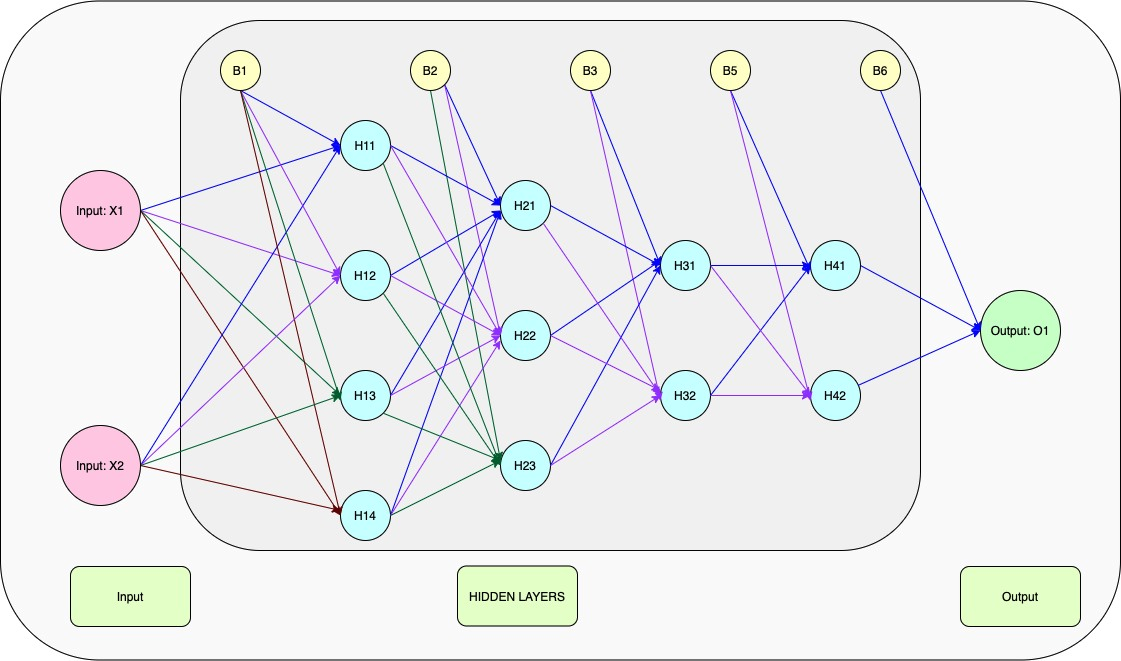